In [ ]:
# IMPORTING NECCESSARY LIBRARIES

import pandas as pd
import numpy as np
import time as time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

In [ ]:
# READING  THE OPENAI TWEETS AND THE ANEW DATASET

anew = pd.read_csv("/content/Ratings_Warriner_et_al.csv")

data = pd.read_csv("/content/tweets_en_processed.csv")
data.head()

,edit_history_tweet_ids,entities,lang,context_annotations,created_at,author_id,id,public_metrics,text,referenced_tweets,...,username,verified,id_user,created_at_user,name,public_metrics_user,description,location,entities_user,doc_length
0,['1727283455480983665'],"{'mentions': [{'start': 3, 'end': 14, 'usernam...",en,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2023-11-22T11:10:41.000Z,1586436915313664005,1727283455480983665,"{'retweet_count': 21, 'reply_count': 0, 'like_...",rt whalechart sam altman reinstated openai ceo,"[{'type': 'retweeted', 'id': '1727269109908525...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,['1727283452431806579'],"{'annotations': [{'start': 0, 'end': 9, 'proba...",en,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2023-11-22T11:10:41.000Z,1601589613373653000,1727283452431806579,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",sam altman return httpstcoeiagyclhfo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,['1727283451030622574'],"{'mentions': [{'start': 3, 'end': 15, 'usernam...",en,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2023-11-22T11:10:40.000Z,1723511895775129600,1727283451030622574,"{'retweet_count': 4, 'reply_count': 0, 'like_c...",rt lnpservices microsoft ceo satya nadella exp...,"[{'type': 'retweeted', 'id': '1727246646390792...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
3,['1727283449671942610'],"{'mentions': [{'start': 0, 'end': 9, 'username...",en,"[{'domain': {'id': '10', 'name': 'Person', 'de...",2023-11-22T11:10:40.000Z,1329828490737233921,1727283449671942610,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",los1990s vkhosla sama openai elonmusk technoje...,"[{'type': 'replied_to', 'id': '172715098691615...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
4,['1727283445628596546'],"{'mentions': [{'start': 3, 'end': 12, 'usernam...",en,"[{'domain': {'id': '46', 'name': 'Business Tax...",2023-11-22T11:10:39.000Z,1693257780491124736,1727283445628596546,"{'retweet_count': 6676, 'reply_count': 0, 'lik...",rt elonmusk letter openai sent seem like conce...,"[{'type': 'retweeted', 'id': '1727096607752282...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


In [ ]:
anew.head()

,Unnamed: 0,Word,V.Mean.Sum,V.SD.Sum,V.Rat.Sum,A.Mean.Sum,A.SD.Sum,A.Rat.Sum,D.Mean.Sum,D.SD.Sum,...,A.Rat.L,A.Mean.H,A.SD.H,A.Rat.H,D.Mean.L,D.SD.L,D.Rat.L,D.Mean.H,D.SD.H,D.Rat.H
0,1,aardvark,6.26,2.21,19,2.41,1.40,22,4.27,1.75,...,11,2.55,1.29,11,4.12,1.64,8,4.43,1.99,7
1,2,abalone,5.30,1.59,20,2.65,1.90,20,4.95,1.79,...,12,2.38,1.92,8,5.55,2.21,11,4.36,1.03,11
2,3,abandon,2.84,1.54,19,3.73,2.43,22,3.32,2.50,...,11,3.82,2.14,11,2.77,2.09,13,4.11,2.93,9
3,4,abandonment,2.63,1.74,19,4.95,2.64,21,2.64,1.81,...,14,5.29,2.63,7,2.31,1.45,16,3.08,2.19,12
4,5,abbey,5.85,1.69,20,2.20,1.70,20,5.00,2.02,...,9,2.55,1.92,11,4.83,2.18,18,5.43,1.62,7


In [ ]:
anew.columns

Index(['Unnamed: 0', 'Word', 'V.Mean.Sum', 'V.SD.Sum', 'V.Rat.Sum',
       'A.Mean.Sum', 'A.SD.Sum', 'A.Rat.Sum', 'D.Mean.Sum', 'D.SD.Sum',
       'D.Rat.Sum', 'V.Mean.M', 'V.SD.M', 'V.Rat.M', 'V.Mean.F', 'V.SD.F',
       'V.Rat.F', 'A.Mean.M', 'A.SD.M', 'A.Rat.M', 'A.Mean.F', 'A.SD.F',
       'A.Rat.F', 'D.Mean.M', 'D.SD.M', 'D.Rat.M', 'D.Mean.F', 'D.SD.F',
       'D.Rat.F', 'V.Mean.Y', 'V.SD.Y', 'V.Rat.Y', 'V.Mean.O', 'V.SD.O',
       'V.Rat.O', 'A.Mean.Y', 'A.SD.Y', 'A.Rat.Y', 'A.Mean.O', 'A.SD.O',
       'A.Rat.O', 'D.Mean.Y', 'D.SD.Y', 'D.Rat.Y', 'D.Mean.O', 'D.SD.O',
       'D.Rat.O', 'V.Mean.L', 'V.SD.L', 'V.Rat.L', 'V.Mean.H', 'V.SD.H',
       'V.Rat.H', 'A.Mean.L', 'A.SD.L', 'A.Rat.L', 'A.Mean.H', 'A.SD.H',
       'A.Rat.H', 'D.Mean.L', 'D.SD.L', 'D.Rat.L', 'D.Mean.H', 'D.SD.H',
       'D.Rat.H'],
      dtype='object')

In [ ]:
# SELECTING WORD AND MEAN VALENCE COLS. FROM ANEW DATASET

anew = anew[["Word", "V.Mean.Sum"]]

In [ ]:
# PERFROMING SOME INITIAL PREPROCESSING STEPS ON THE DATA

def process(data):

    data = data.drop_duplicates()
    data = data[["created_at", "location", "name", "text"]]
    data['created_at'] = pd.to_datetime(data['created_at'])
    data['date'] = data['created_at'].dt.strftime('%Y-%m-%d %H:%M:%S')
    data = data.drop("created_at",axis = 1)

    return data

data = process(data)
data.head()

,location,name,text,date
0,NaN,NaN,rt whalechart sam altman reinstated openai ceo,2023-11-22 11:10:41
1,NaN,NaN,sam altman return httpstcoeiagyclhfo,2023-11-22 11:10:41
2,NaN,NaN,rt lnpservices microsoft ceo satya nadella exp...,2023-11-22 11:10:40
3,NaN,NaN,los1990s vkhosla sama openai elonmusk technoje...,2023-11-22 11:10:40
4,NaN,NaN,rt elonmusk letter openai sent seem like conce...,2023-11-22 11:10:39


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# CALCUALTING HAPPINESS OF TWEETS USING ANEW MODEL

def happiness(tweet, anew_data):
    words = word_tokenize(tweet.lower())
    scores = []
    for i in words:
        score = anew_data[anew_data['Word'] == i]['V.Mean.Sum'].values
        if len(score) > 0:
            scores.append(score[0])
    if len(scores) > 0:
        avg_happiness = np.mean(scores)
    else:
        avg_happiness = 0
    return avg_happiness

data['happiness_score'] = data['text'].apply(lambda x: happiness(x, anew))

In [ ]:
data.head()

,location,name,text,date,happiness_score
0,NaN,NaN,rt whalechart sam altman reinstated openai ceo,2023-11-22 11:10:41,0.000
1,NaN,NaN,sam altman return httpstcoeiagyclhfo,2023-11-22 11:10:41,5.950
2,NaN,NaN,rt lnpservices microsoft ceo satya nadella exp...,2023-11-22 11:10:40,6.330
3,NaN,NaN,los1990s vkhosla sama openai elonmusk technoje...,2023-11-22 11:10:40,5.810
4,NaN,NaN,rt elonmusk letter openai sent seem like conce...,2023-11-22 11:10:39,5.905


In [ ]:
# REMOVING TWEETS WITH 0 HAPPINESS SCORES AS ITS WORDS WERE NOT PRESENT IN THE ANEW MODEL

data = data[data["happiness_score"]!=0]

Text(0, 0.5, 'Density')

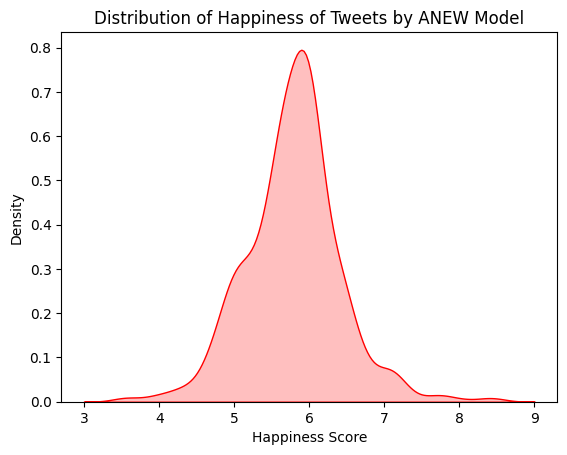

In [ ]:
# CHECKING DISTRIBUTION OF HAPPINESS SCORES CALC. BY ANEW MODEL

sns.kdeplot(data['happiness_score'], fill = True, color = 'red')

plt.title("Distribution of Happiness of Tweets by ANEW Model")
plt.xlabel("Happiness Score")
plt.ylabel("Density")

Text(0.5, 1.0, 'Top Users with Highest Happiness Scores')

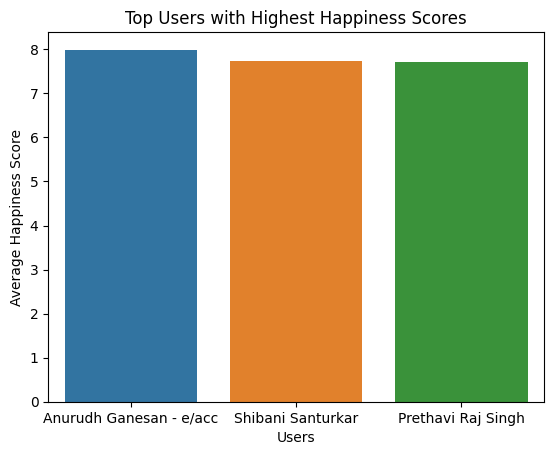

In [ ]:
# PRINTING USERS WITH THE HIGHEST HAPPINESS

top_users = data.nlargest(5, 'happiness_score')

sns.barplot(x='name', y='happiness_score', data=top_users)

plt.xlabel('Users')
plt.ylabel('Average Happiness Score')
plt.title('Top Users with Highest Happiness Scores')

In [ ]:
# CREATING SEPERATE DATAFRAMES FOR TWEETS CONTAINING SPECIFIC WORDS

sama_tweets = data[data['text'].str.contains('sama', case=False)]
openai_tweets = data[data['text'].str.contains('openai', case=False)]
satya_tweets = data[data['text'].str.contains('satya', case=False)]
msft_tweets = data[data['text'].str.contains('Microsoft', case=False)]
ai_tweets = data[data['text'].str.contains('ai', case=False)]

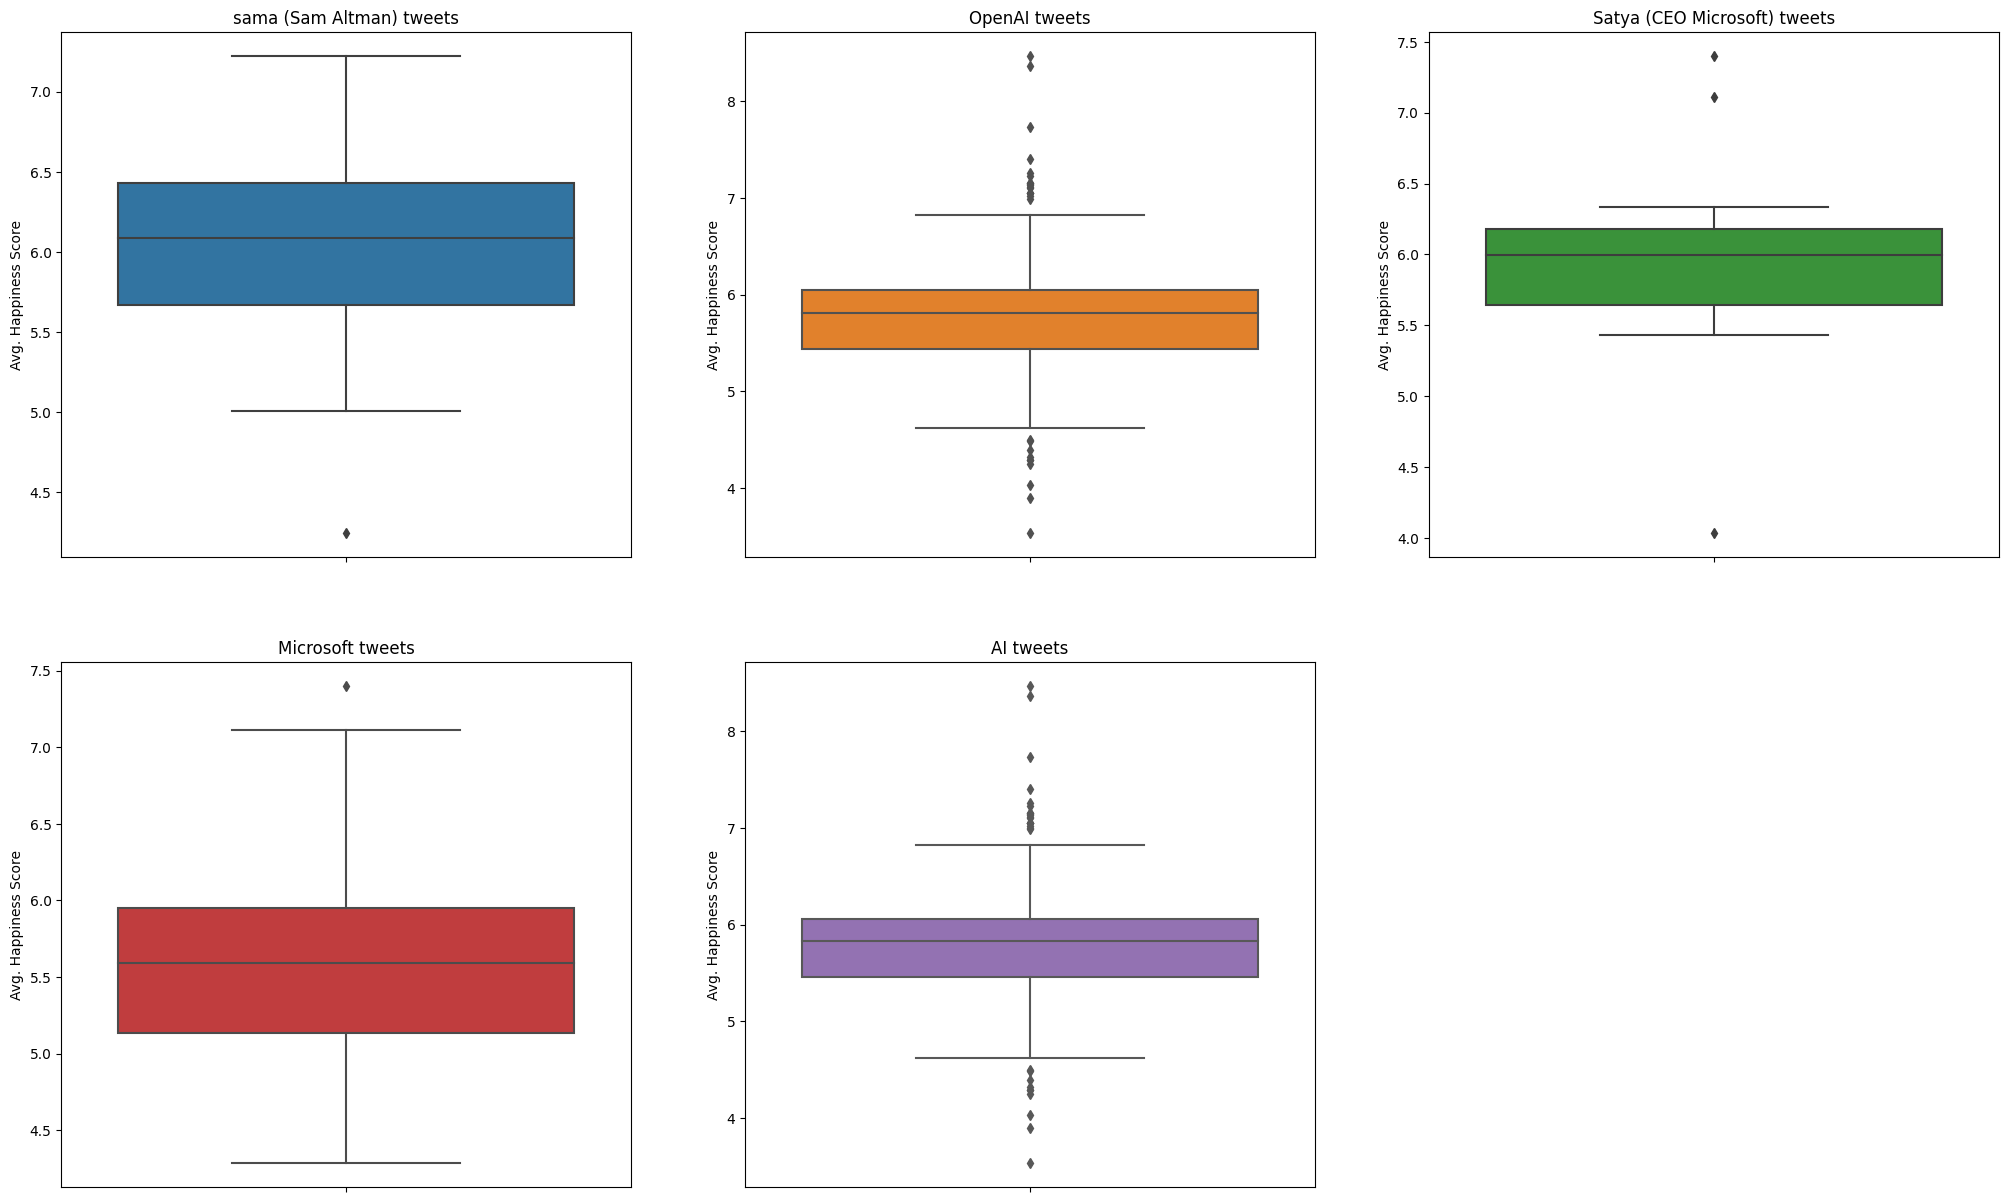

In [ ]:
# CEHCKING DISTRIBUTION OF HAPPINESS FOR TWEETS CONTAINING SPECIFIC WORDS

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25, 15))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

sns.boxplot(y='happiness_score', data=sama_tweets, ax=axes[0][0], color=colors[0])
axes[0][0].set_ylabel('Avg. Happiness Score ')
axes[0][0].set_title('Tweets with Sam Altman (sama)')

sns.boxplot(y='happiness_score', data=openai_tweets, ax=axes[0][1], color=colors[1])
axes[0][1].set_ylabel('Avg. Happiness Score')
axes[0][1].set_title('Tweets with OpenAI')

sns.boxplot(y='happiness_score', data=satya_tweets, ax=axes[0][2], color=colors[2])
axes[0][2].set_ylabel('Avg. Happiness Score')
axes[0][2].set_title('Tweets with Microsoft CEO (Satya)')

sns.boxplot(y='happiness_score', data=msft_tweets, ax=axes[1][0], color=colors[3])
axes[1][0].set_ylabel('Avg. Happiness Score')
axes[1][0].set_title('Tweets with Microsoft')

sns.boxplot(y='happiness_score', data=ai_tweets, ax=axes[1][1], color=colors[4])
axes[1][1].set_ylabel('Avg. Happiness Score')
axes[1][1].set_title('Tweets with AI')

fig.delaxes(axes[1][2])

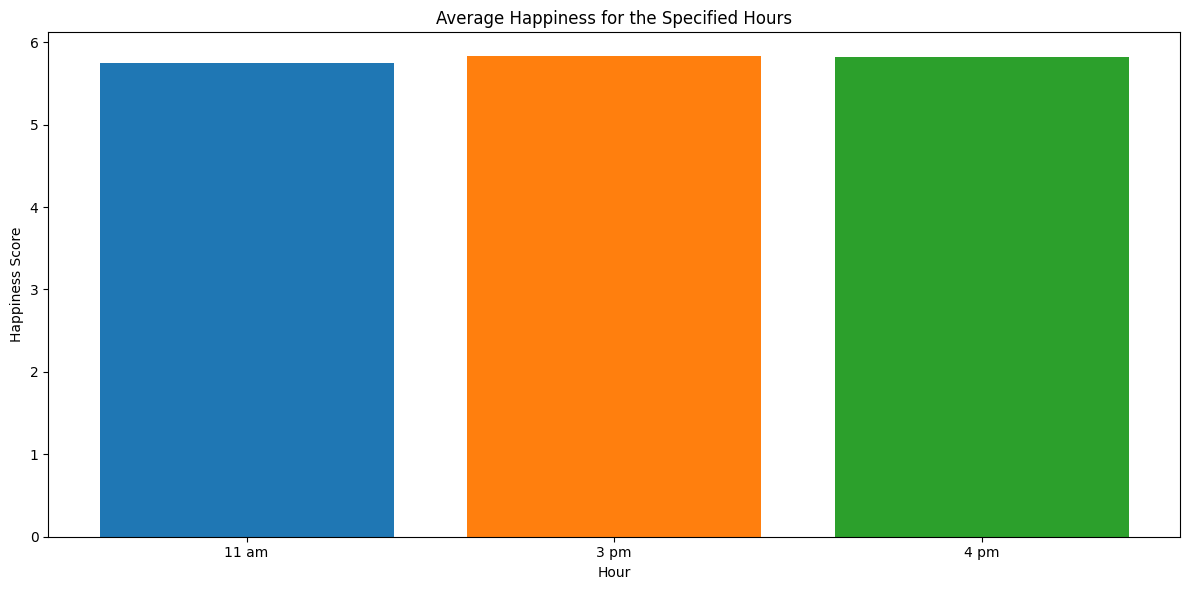

In [ ]:
# CHECKING AVG HAPPINESS FOR ALL THE 3 HOURS THAT WE HAVE

data['date'] = pd.to_datetime(data['date'])
data_selected_hours = data[data['date'].dt.hour.isin([11, 15, 16])]

happiness_by_hour = data_selected_hours.groupby(data_selected_hours['date'].dt.hour).mean()['happiness_score']

plt.figure(figsize=(12, 6))
plt.bar(['11 am', '3 pm', '4 pm'], happiness_by_hour.values, color = ["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.title('Average Happiness for the Specified Hours')
plt.xlabel('Hour')
plt.ylabel('Happiness Score')
plt.tight_layout()
plt.show()

In [ ]:
# TAKING ONLY ROWS WITH LOCATION MENTIONED

data_wloc = data.dropna(subset=["location"])
data_wloc.shape

(167, 5)

In [ ]:
data_wloc.head()

,location,name,text,date,happiness_score
178,dark playground,すずき,rt verge breaking sam altman return ceo openai...,2023-11-22 11:15:21,5.315
180,Singapore,abhijit mohanty,anything avoid using microsoft team samaltman,2023-11-22 11:15:20,5.005
181,"Nairobi, Kenya",Injinia,marketing 101 httpstcoljb97y0daw,2023-11-22 11:15:20,4.830
182,Token World,Tokenspath 🟦,rt openai reached agreement principle sam altm...,2023-11-22 11:15:19,6.015
183,Mumbai,Maeeshat Media,sam altman return openai new board amp nadella...,2023-11-22 11:15:19,6.328


In [ ]:
# GETTING LATITUDES AND LONGITUDES FOR THE ALL

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="Geopy Library")

data_wloc['latitude'] = data_wloc['location'].apply(lambda x: geolocator.geocode(x).latitude if geolocator.geocode(x) else None)
data_wloc['longitude'] = data_wloc['location'].apply(lambda x: geolocator.geocode(x).longitude if geolocator.geocode(x) else None)

In [ ]:
data_wloc.head()

,location,name,text,date,happiness_score,latitude,longitude
178,dark playground,すずき,rt verge breaking sam altman return ceo openai...,2023-11-22 11:15:21,5.315,41.096449,44.643258
180,Singapore,abhijit mohanty,anything avoid using microsoft team samaltman,2023-11-22 11:15:20,5.005,1.357107,103.819499
181,"Nairobi, Kenya",Injinia,marketing 101 httpstcoljb97y0daw,2023-11-22 11:15:20,4.830,-1.302615,36.828842
182,Token World,Tokenspath 🟦,rt openai reached agreement principle sam altm...,2023-11-22 11:15:19,6.015,NaN,NaN
183,Mumbai,Maeeshat Media,sam altman return openai new board amp nadella...,2023-11-22 11:15:19,6.328,18.973354,72.828105


In [ ]:
# KEEPING ONLY THE TWEETS WITH LATITUDE AVAILABLE

data_wloc = data_wloc.dropna(subset=["latitude"])
data_wloc.shape

(146, 7)

In [ ]:
df_to_save = data_wloc

df_to_save.to_csv('data_WLOC.csv', index=False)

In [ ]:
# GETTING THE COUNTRY NAMES FROM LATITUDES AND LONGITUDES

geolocator = Nominatim(user_agent='Geopy Library')

country_names = []

for index, row in data_wloc.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    if location is not None and 'address' in location.raw:
        country = location.raw['address'].get('country')
        country_names.append(country)
    else:
        country_names.append(None)

data_wloc['Country'] = country_names
data_wloc.head()

,location,name,text,date,happiness_score,latitude,longitude,Country
178,dark playground,すずき,rt verge breaking sam altman return ceo openai...,2023-11-22 11:15:21,5.315000,41.096449,44.643258,Հայաստան
180,Singapore,abhijit mohanty,anything avoid using microsoft team samaltman,2023-11-22 11:15:20,5.005000,1.357107,103.819499,Singapore
181,"Nairobi, Kenya",Injinia,marketing 101 httpstcoljb97y0daw,2023-11-22 11:15:20,4.830000,-1.302615,36.828842,Kenya
183,Mumbai,Maeeshat Media,sam altman return openai new board amp nadella...,2023-11-22 11:15:19,6.328000,18.973354,72.828105,India
186,"New York, NY",maxwell,rt stokel ’ clear openai said ceo friday liar ...,2023-11-22 11:15:15,4.703333,40.712728,-74.006015,United States


In [ ]:
df_to_save = data_wloc

df_to_save.to_csv('data_locations.csv', index=False)